In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore",category=matplotlib.MatplotlibDeprecationWarning)

In [3]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score,KFold, cross_validate

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin

In [6]:
plt.style.use('fivethirtyeight')

In [7]:
pd.options.display.max_columns = None

In [8]:
df = pd.read_csv("data/final-imputed/final-full-imputed-v1.csv")
df.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,TotalFloors,Overlooking,Main Road,Park/Garden,Pool,Club,Overlook Others,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,Luxury Score,Facilities Categories,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.555556,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,18000.0,NaN,18000.0,sq.yards,7,7,4,Servant Room,0,1,0,0,0,North-West,0,2,Others,0,0,0,0,1,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",1,1,0,No,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...",19,Standard,"['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


Lets drop unecessary columns not needed for price predictions

In [9]:
df.drop(columns = ['property_id', 'property_name', 'link','Society','address1', 'address2','area','PricePerUnit',
                   'Super Built Up','Carpet area','Plot Area','area_unit','additionalRoom','Overlooking','RoadFacing',
                   'WaterSource','description','furnishDetails','Luxury Score','features'],inplace = True)

In [10]:
df.rename(columns = {'Built Up area':'Area'},inplace = True)

In [11]:
df.head(1)

,property_type,Sector,City,Area,bedRoom,bathroom,balcony,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,TotalFloors,Main Road,Park/Garden,Pool,Club,Overlook Others,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,Facilities Categories,price
0,House/Villa,Sector 15 Chandigarh,Chandigarh,18000.0,7,7,4,0,1,0,0,0,North-West,0,2,0,0,0,0,1,Old,Marble,No,Semifurnished,3,3,1,1,0,No,Yes,Yes,Standard,28.0


In [12]:
df['TotalFloors'].value_counts().sort_index()

TotalFloors
0        7
1      553
2     2281
3     1609
4      679
5       98
6      196
7       99
8      142
9       86
10     150
11     116
12     284
13     376
14     333
15     195
16     200
17     338
18     115
19     127
20      21
21      64
22     118
23      56
24      34
25     109
26      10
27       1
28       2
30       8
32       2
33       9
34       2
35       1
42       7
43       1
Name: count, dtype: int64

In [13]:
def categorize_floor(floor):
    if floor <= 3:
        return 'Low-Rise'
    elif 4 <= floor <= 12:
        return 'Mid-Rise'
    elif 13 <= floor <= 40:
        return 'High-Rise'
    else:
        return 'Ultra-High-Rise'

In [14]:
df['TotalFloors'].apply(categorize_floor)

0       Low-Rise
1       Low-Rise
2       Low-Rise
3       Low-Rise
4       Low-Rise
          ...   
8424    Mid-Rise
8425    Mid-Rise
8426    Low-Rise
8427    Mid-Rise
8428    Mid-Rise
Name: TotalFloors, Length: 8429, dtype: object

In [15]:
df.insert(14,'FloorRise',value = df['TotalFloors'].apply(categorize_floor))

In [16]:
df.head(1)

,property_type,Sector,City,Area,bedRoom,bathroom,balcony,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,FloorRise,TotalFloors,Main Road,Park/Garden,Pool,Club,Overlook Others,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,Facilities Categories,price
0,House/Villa,Sector 15 Chandigarh,Chandigarh,18000.0,7,7,4,0,1,0,0,0,North-West,0,Low-Rise,2,0,0,0,0,1,Old,Marble,No,Semifurnished,3,3,1,1,0,No,Yes,Yes,Standard,28.0


In [17]:
df.drop(columns = 'TotalFloors',inplace = True)

##### Custom Graph Functions

In [18]:
# For Numerical Columns
def hist_box_scat_graph(columns_list,df,target_column='price'):
    '''
    columns_list: list of columns you want to plot.
    df: Dataframe from which columns to be plot.
    target_column : column against which you want to plot scatter plot.
    '''
    for col in columns_list:
        plt.figure(figsize=(15, 3))
        plt.title(col)
        
        plt.subplot(1,3,1)
        sns.histplot(x = df[col], kde=True)
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
        plt.subplot(1,3,2)
        sns.boxplot(x=df[col])
        
        plt.subplot(1,3,3)
        sns.scatterplot(x=df[col],y=df[target_column])
        
        plt.show()
        plt.close()

In [19]:
### For Categorical Columns

def bar_box_pie_plot(cat_col_list,df,target_column = 'price'):
    '''
    columns_list: list of columns you want to plot.
    df: Dataframe from which columns to be plot.
    target_column : column against which you want to plot boxplot.
    '''
    for col in cat_col_list:
        temp = df[col].value_counts().reset_index()
        temp.columns = [col, 'Count']
        
        plt.figure(figsize=(15, 3))
        plt.title(col)
        
        plt.subplot(1,3,1)
        sns.barplot(temp,x=col,y='Count')
        plt.xticks(rotation=90)
        
        plt.subplot(1,3,2)
        sns.boxplot(df,x=col,y = target_column)
        plt.xticks(rotation=90)
        
        plt.subplot(1,3,3)
        plt.pie(x = temp['Count'],autopct='%.2f',labels=temp[col])
        plt.show()
        plt.close()

### Target Column

Skewness: 6.514929004406317


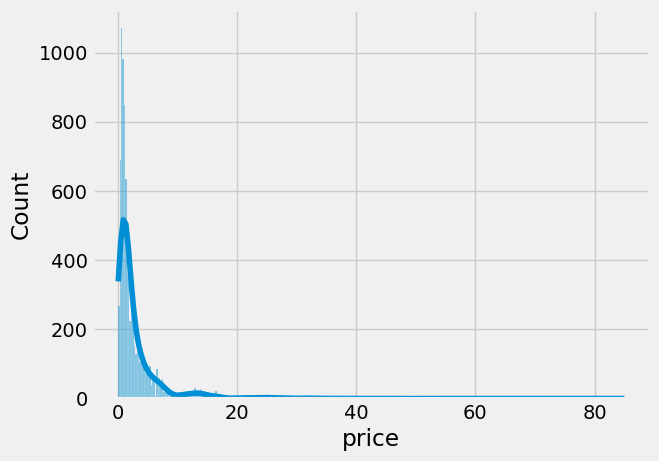

In [20]:
print(f"Skewness: { df['price'].skew() }")
sns.histplot(x = df['price'],kde=True)
plt.show()

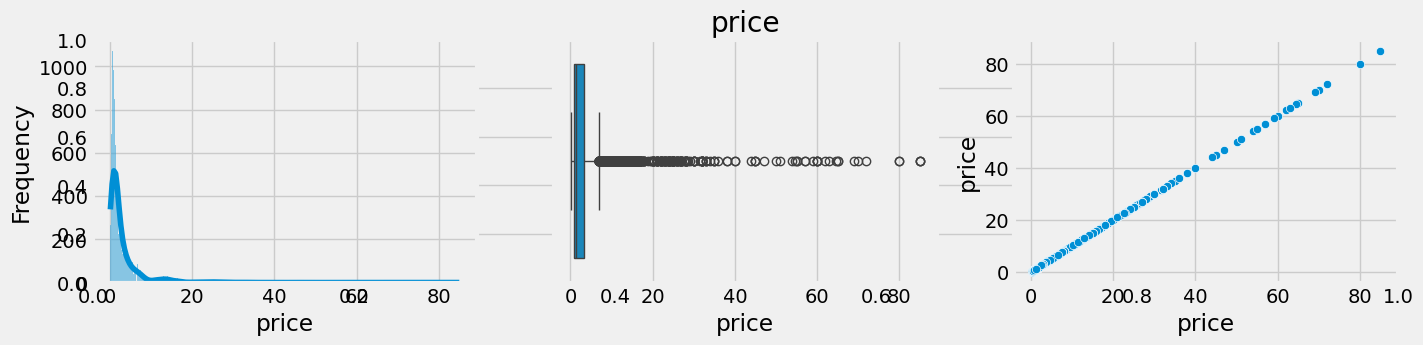

In [21]:
hist_box_scat_graph(['price'],df)

Skewness: 0.6152331102332165


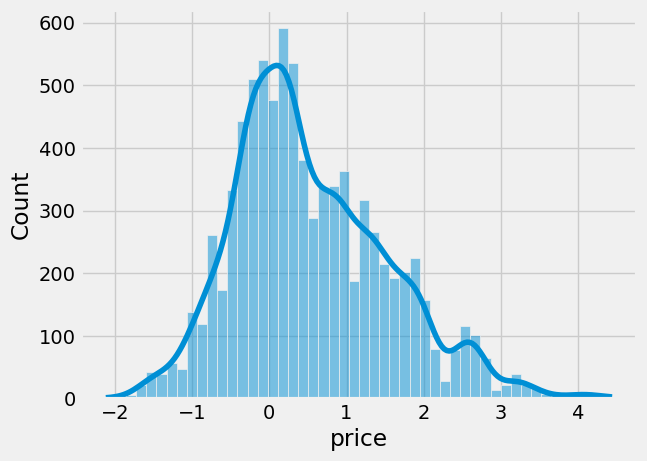

In [22]:
# Log Transformation
print(f"Skewness: { (np.log(df['price'])).skew() }")
sns.histplot(x = np.log(df['price']),kde=True)
plt.show()

In [23]:
df['price'] = np.log1p(df['price'])

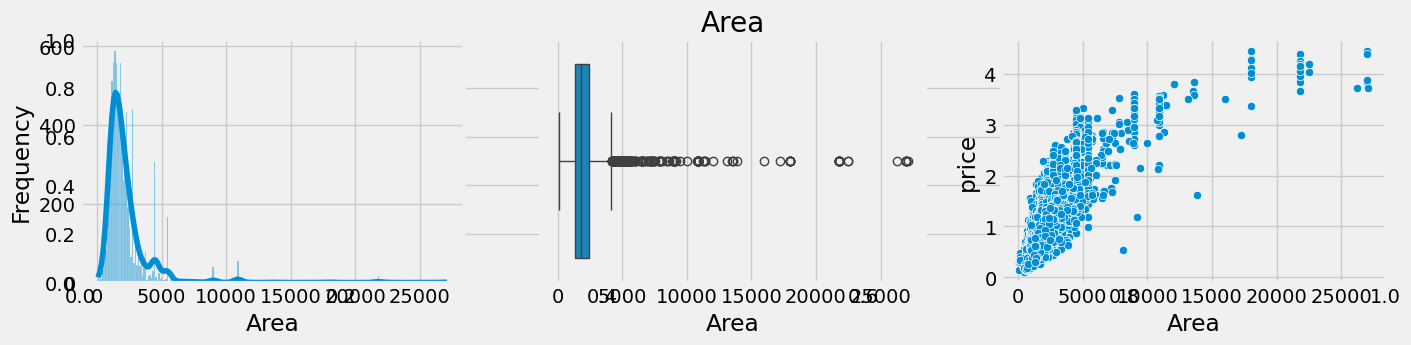

In [24]:
hist_box_scat_graph(['Area'],df)

In [25]:
#np.log(df['Area'])

<Axes: xlabel='Area', ylabel='price'>

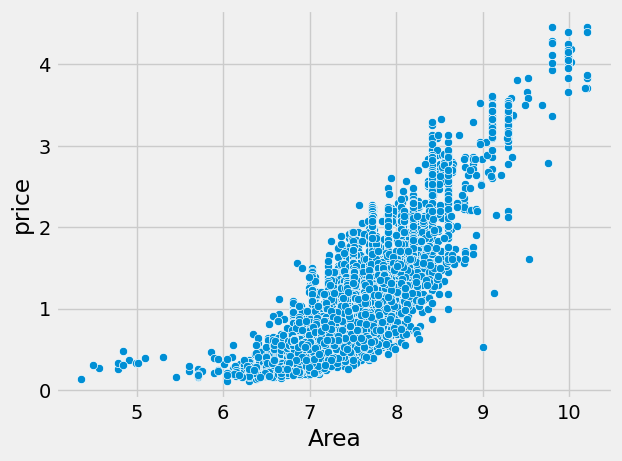

In [26]:
sns.scatterplot(x = np.log(df['Area']), y = df['price'])

Skewness: 0.6369908172288162


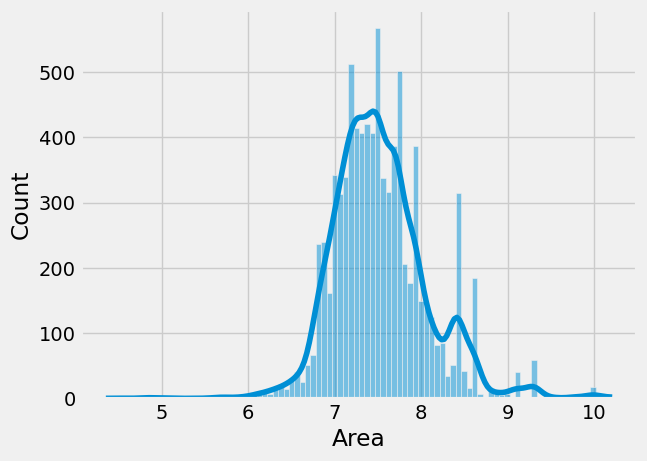

In [27]:
# Log Transformation
print(f"Skewness: { (np.log(df['Area'])).skew() }")
sns.histplot(x = np.log(df['Area']),kde=True)
plt.show()

In [28]:
df['Area'] = np.log(df['Area'])

### Categorical Columns

In [29]:
cat_cols = list(df.columns)
cat_cols.remove('Area')
cat_cols.remove('price')

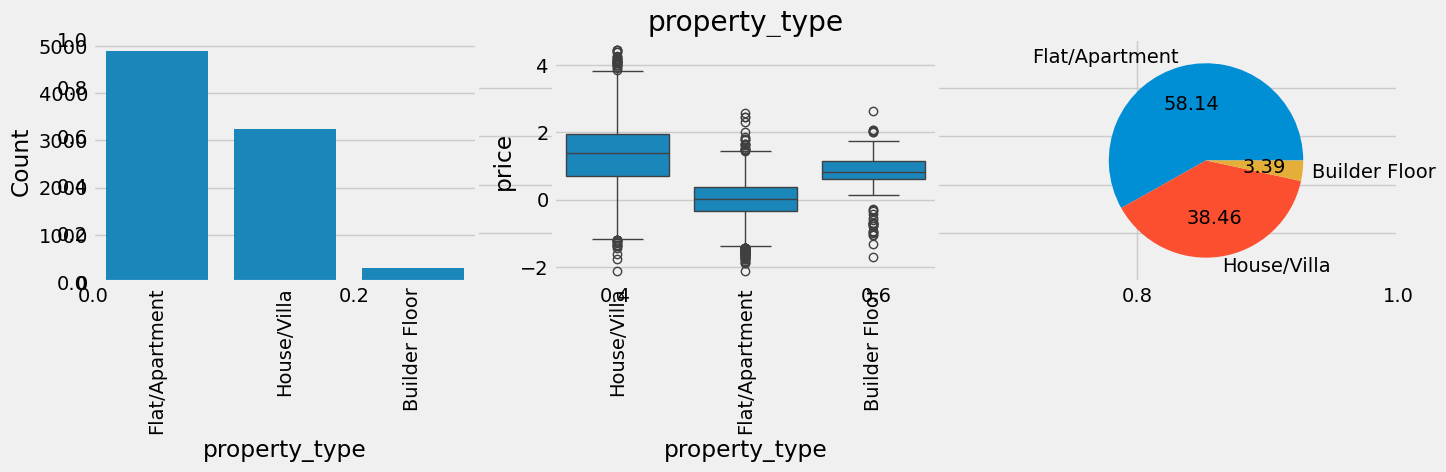

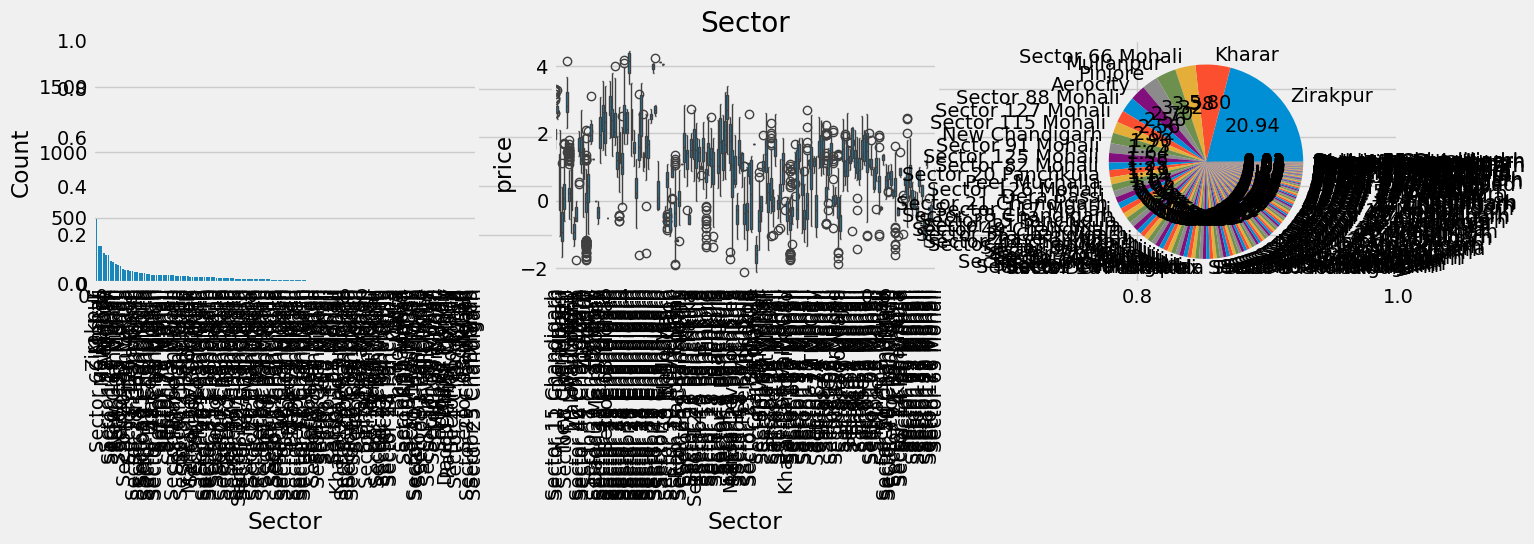

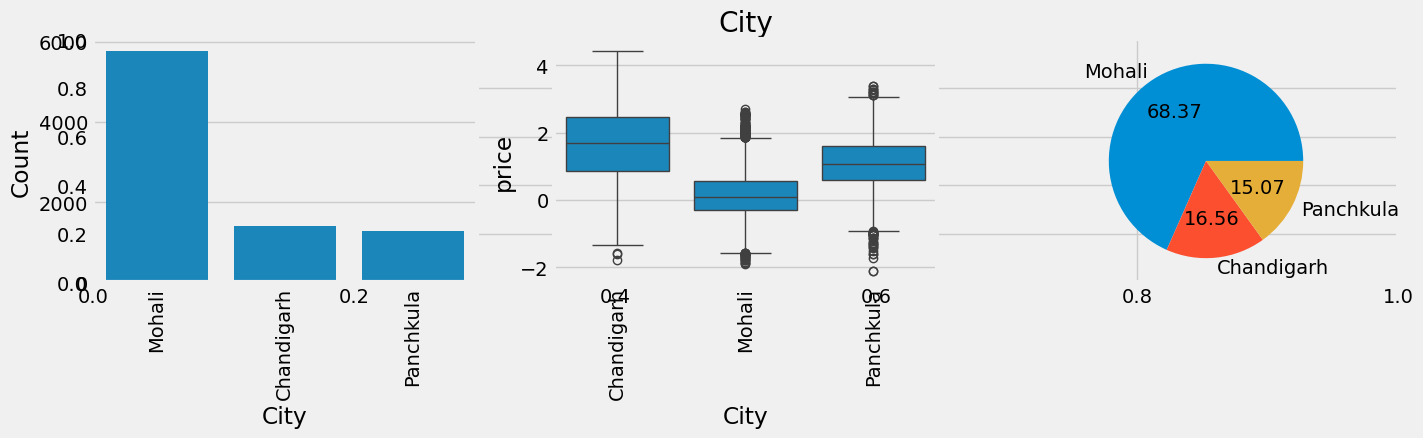

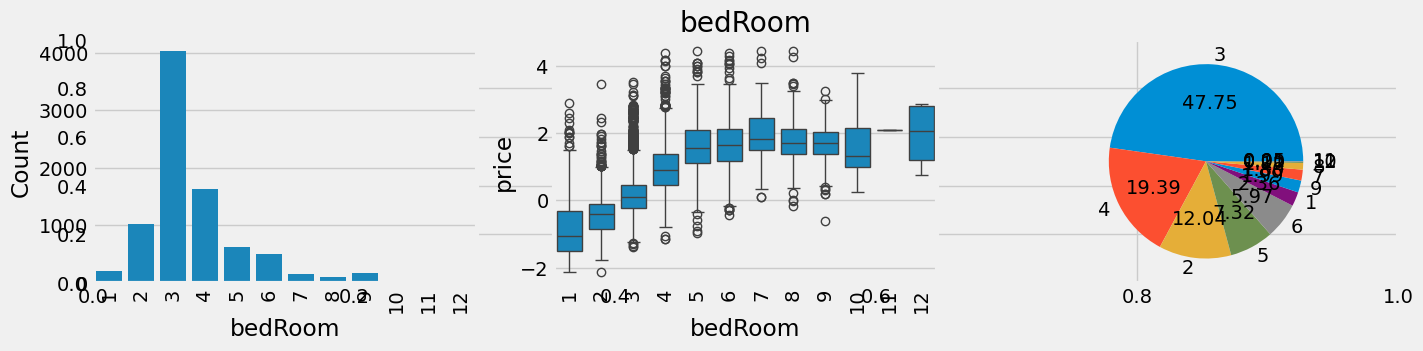

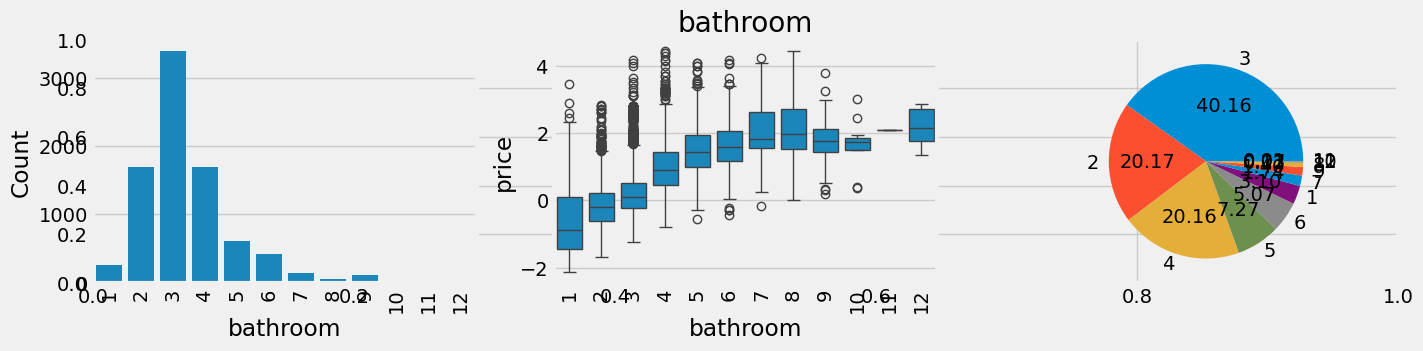

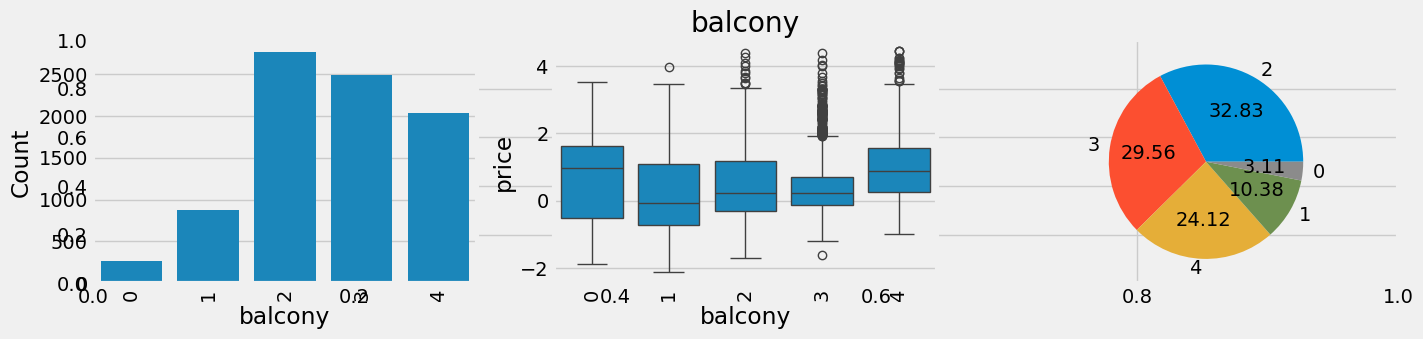

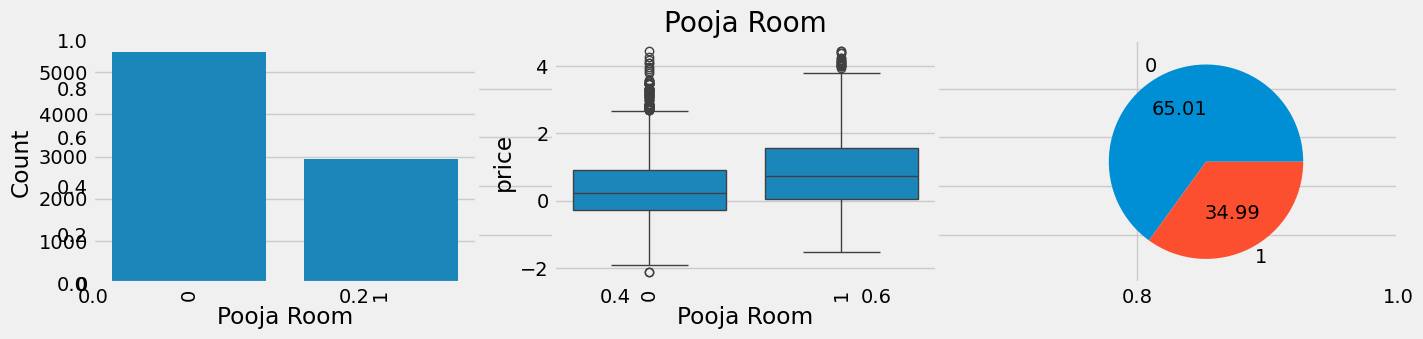

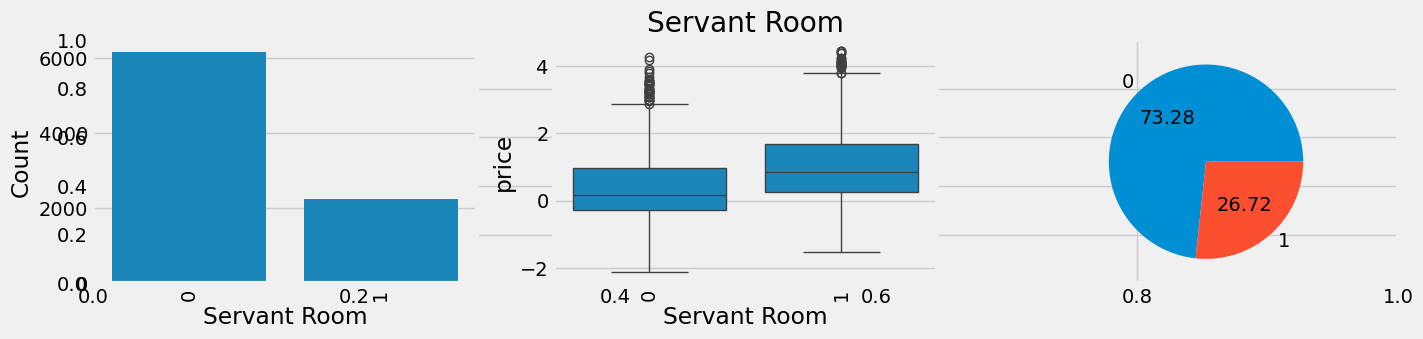

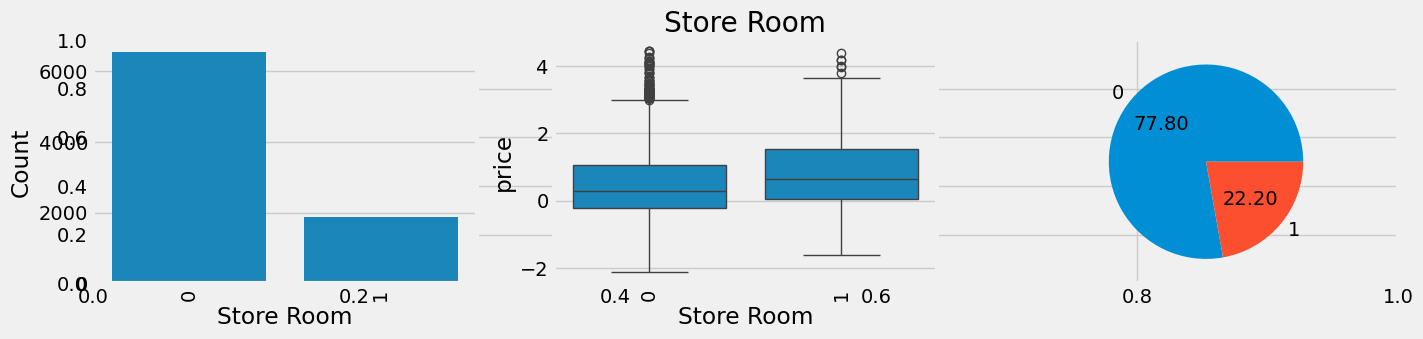

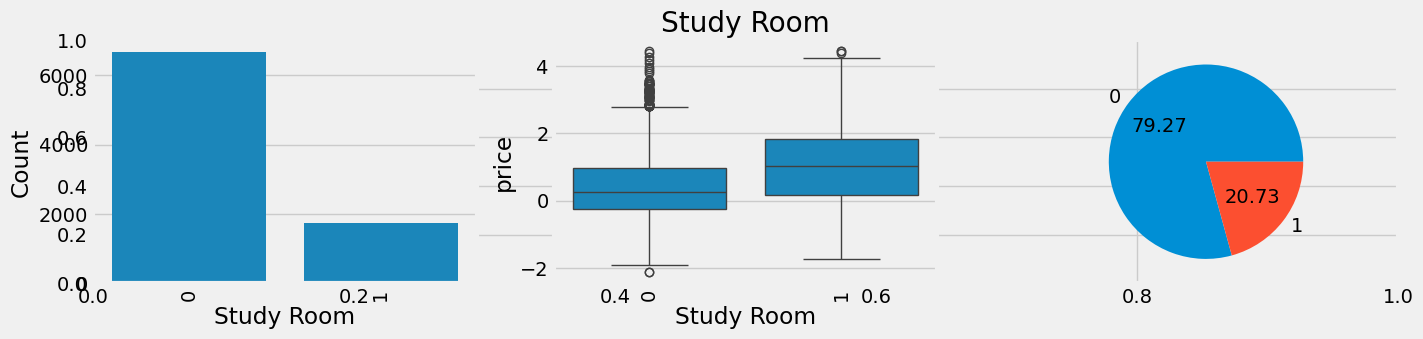

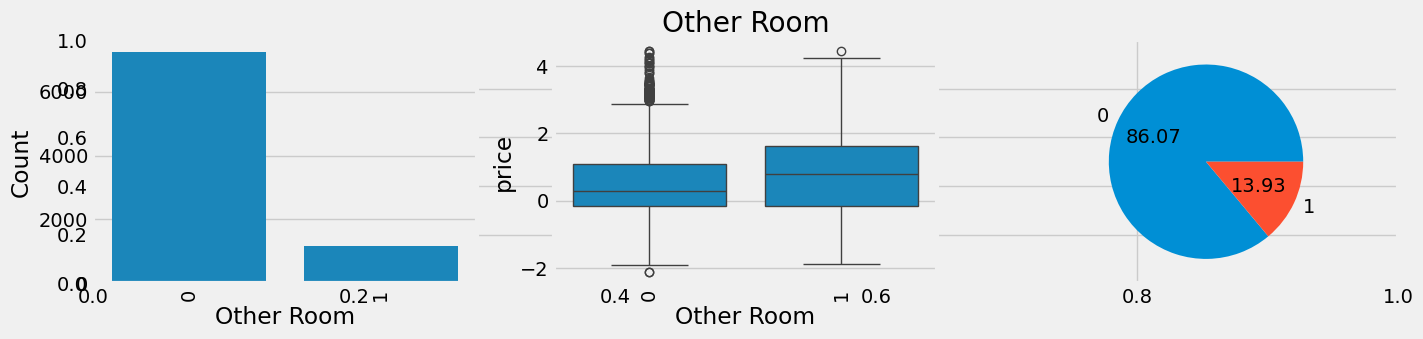

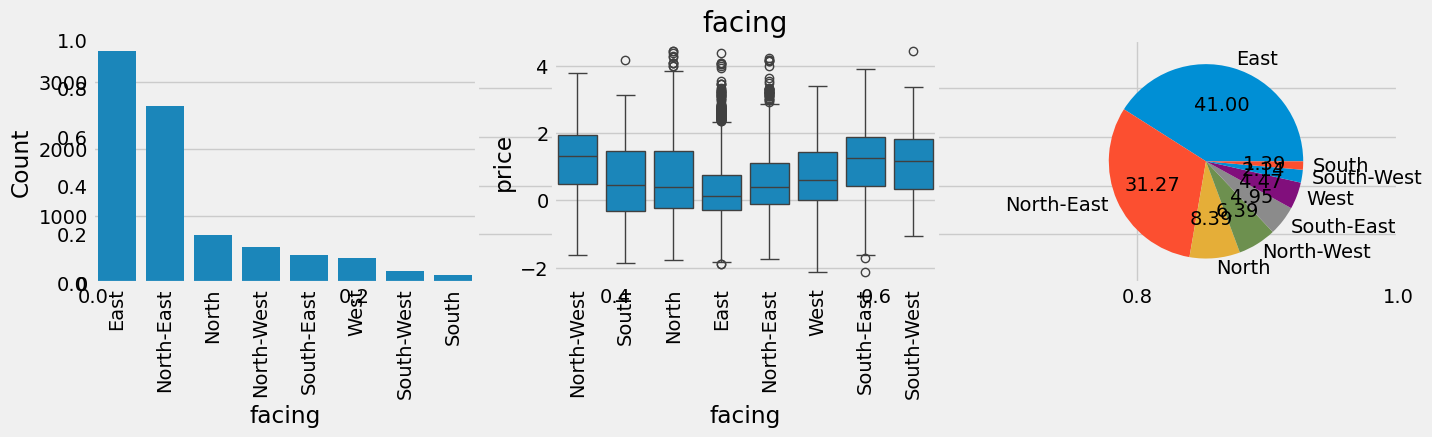

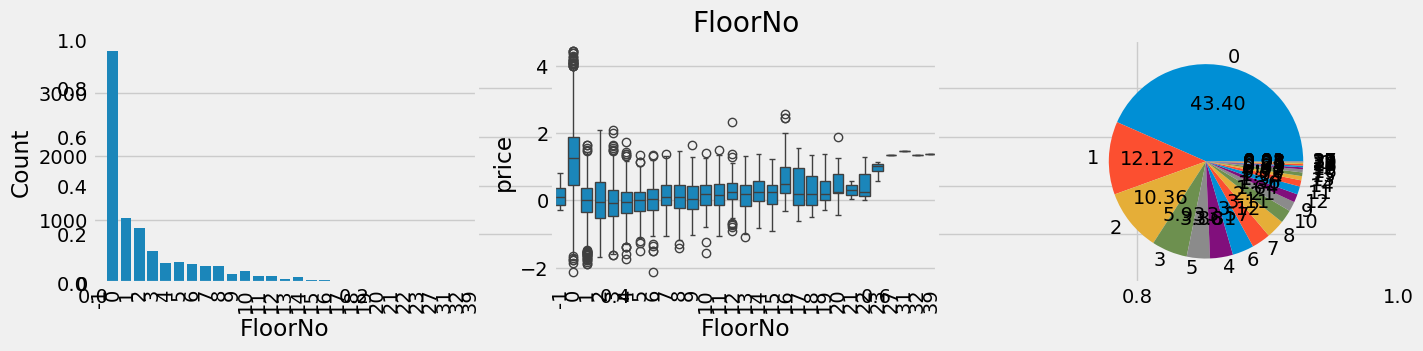

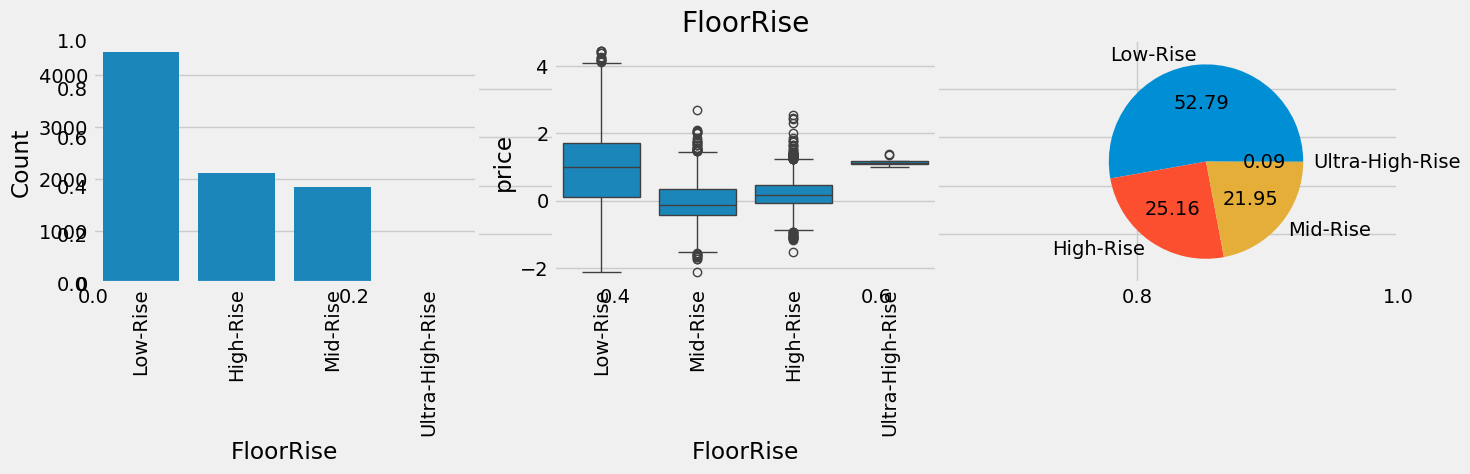

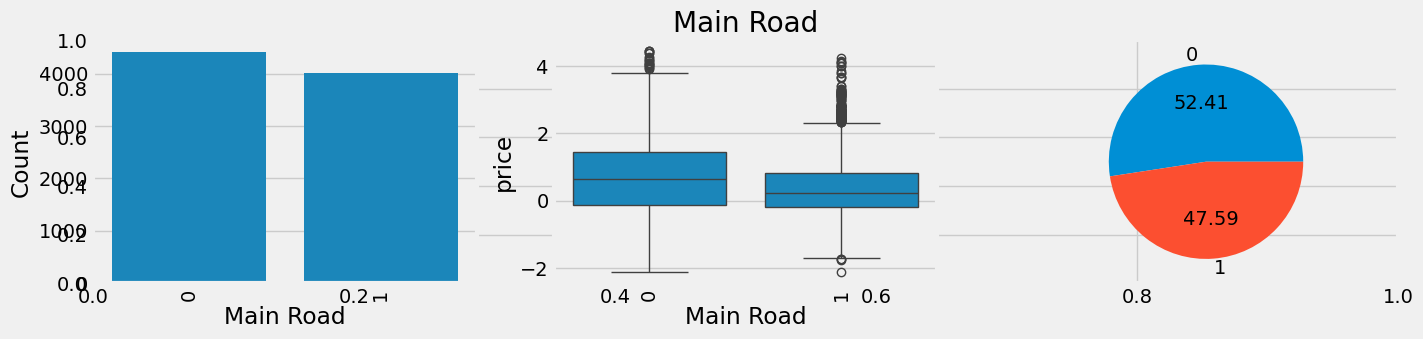

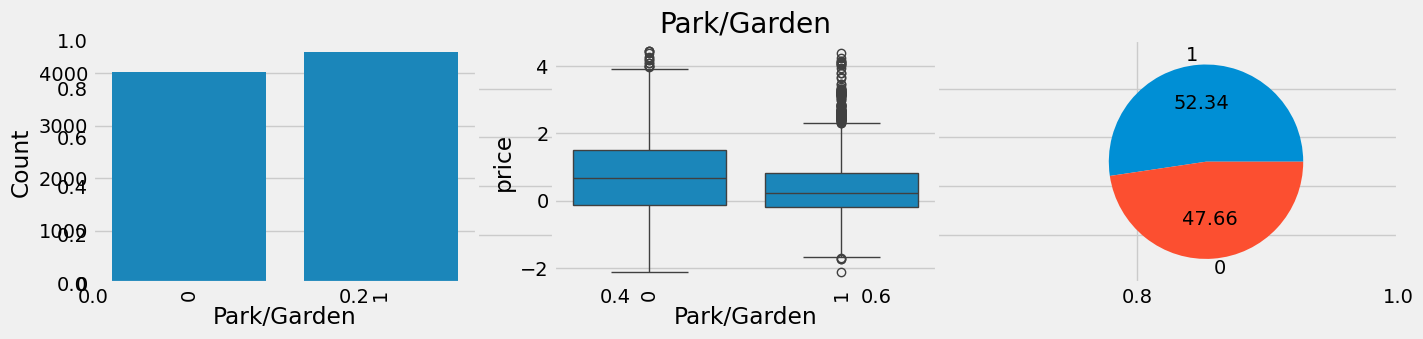

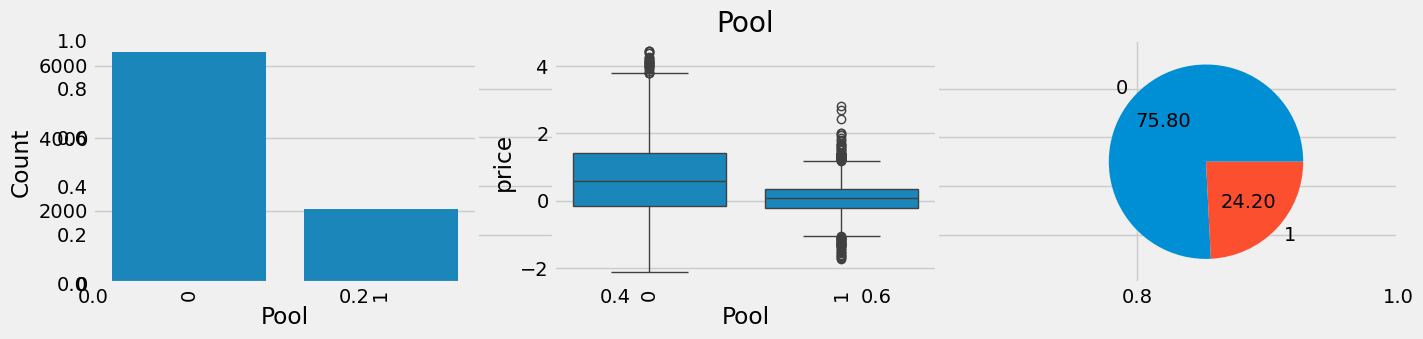

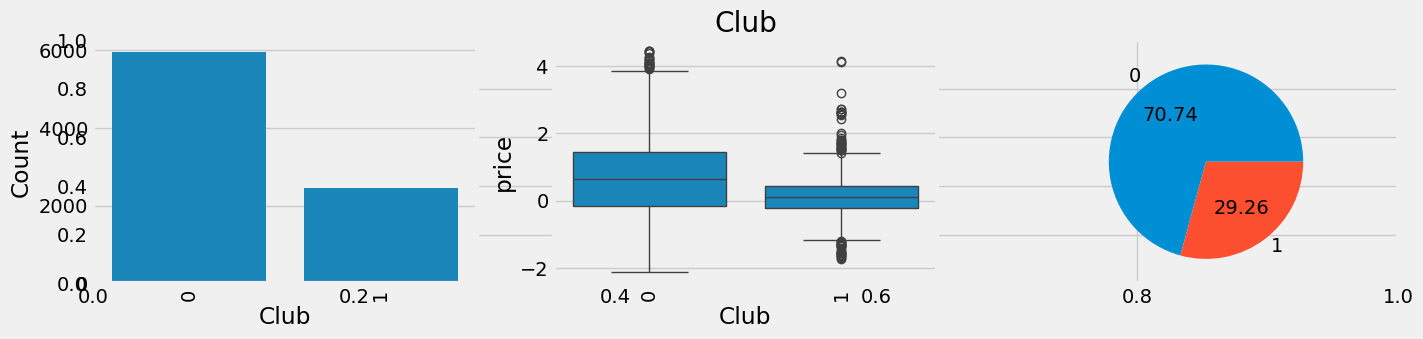

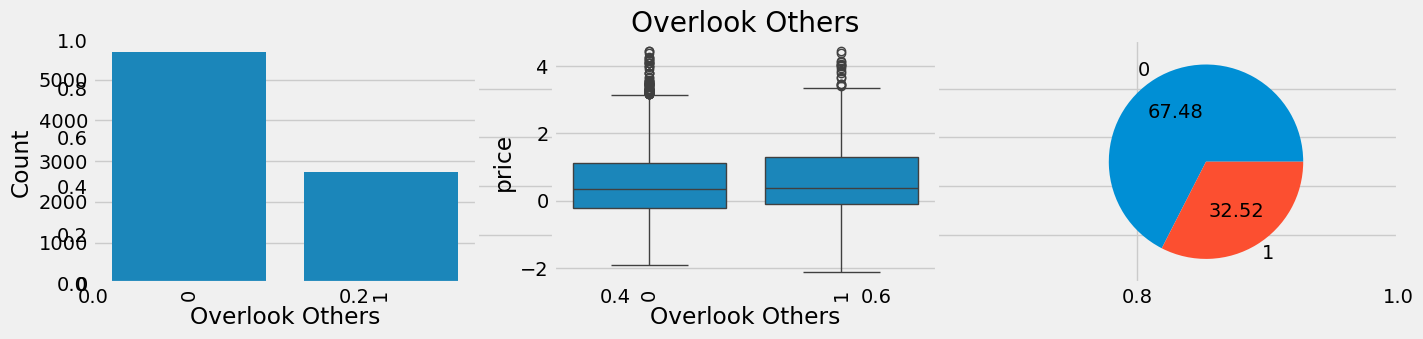

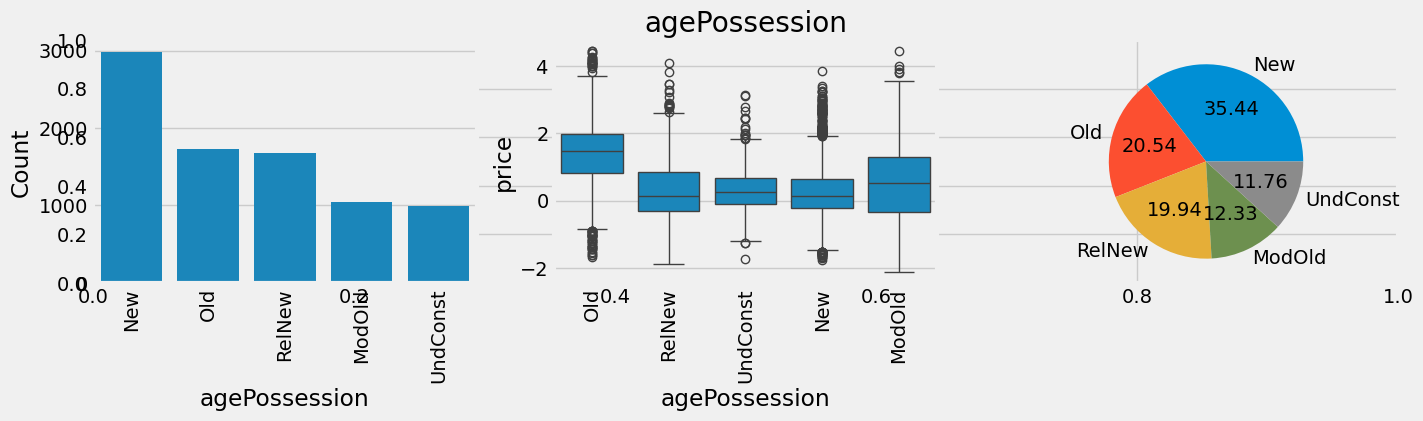

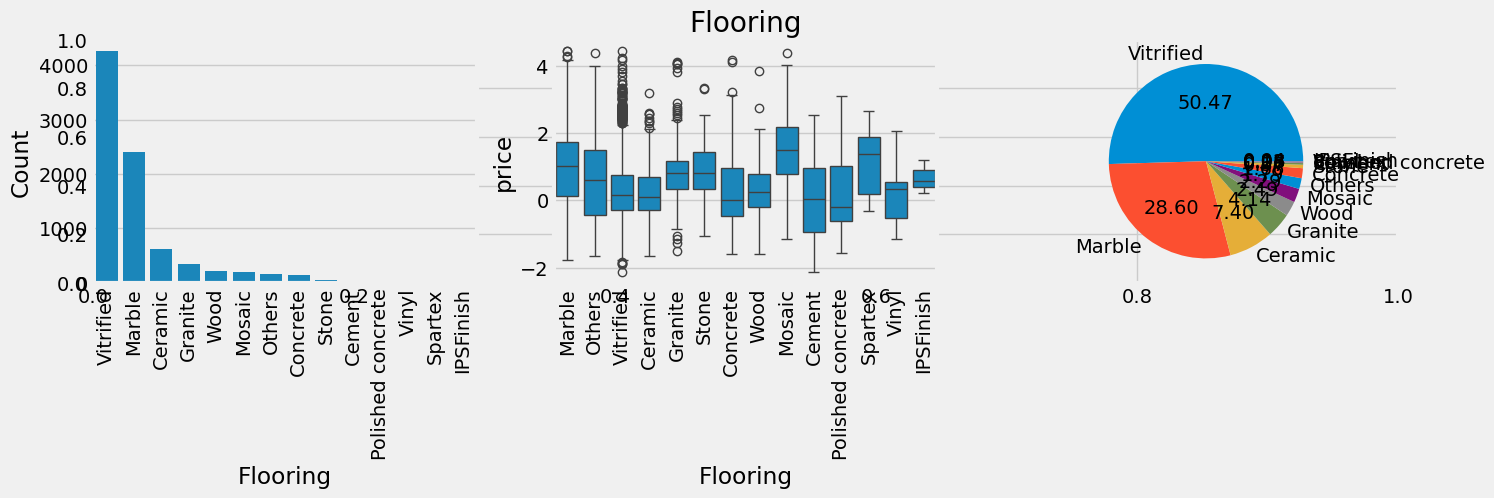

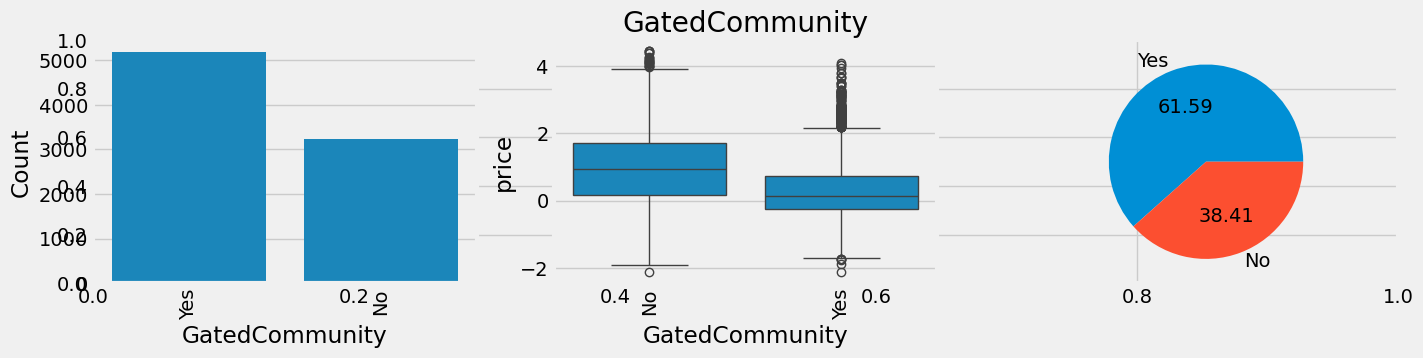

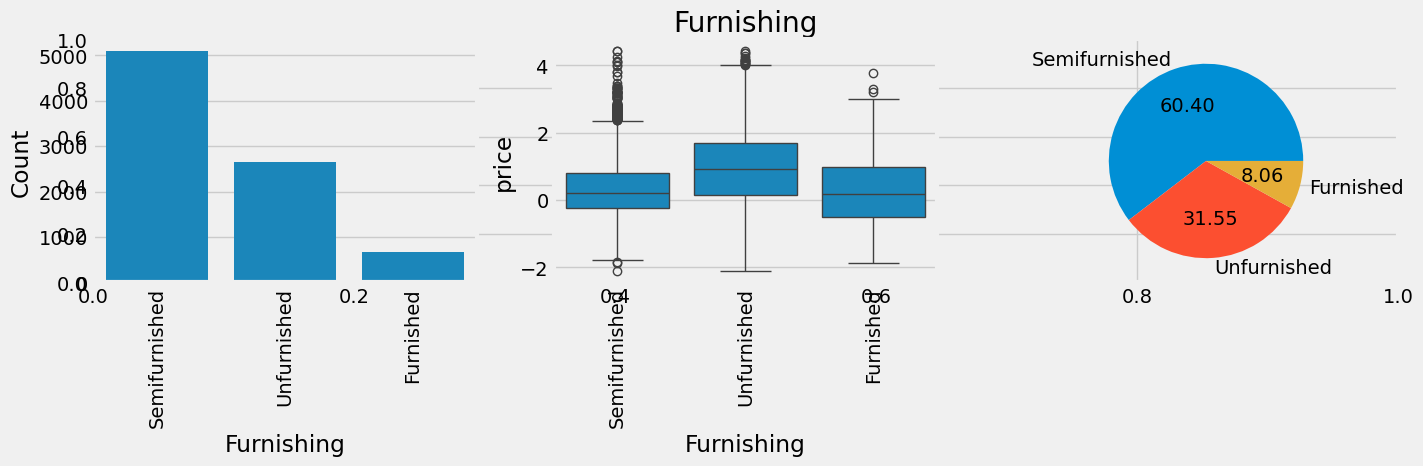

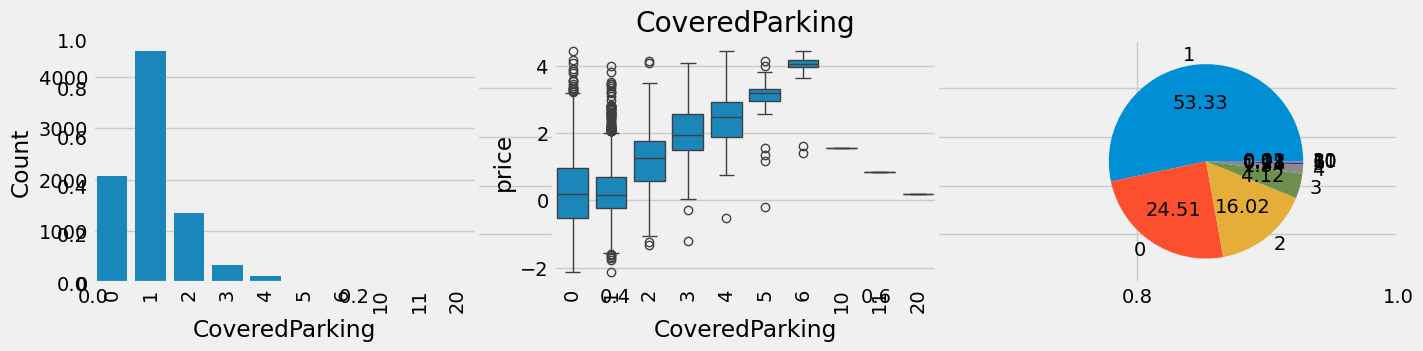

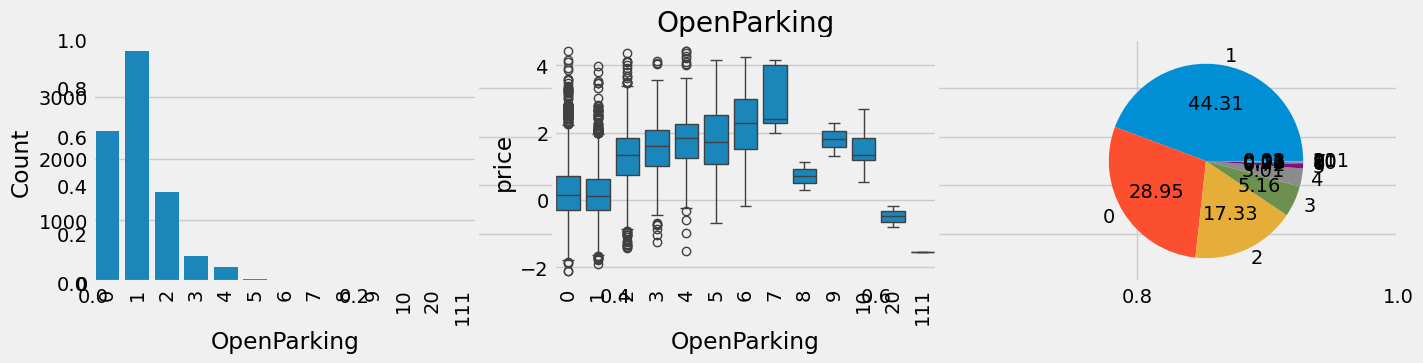

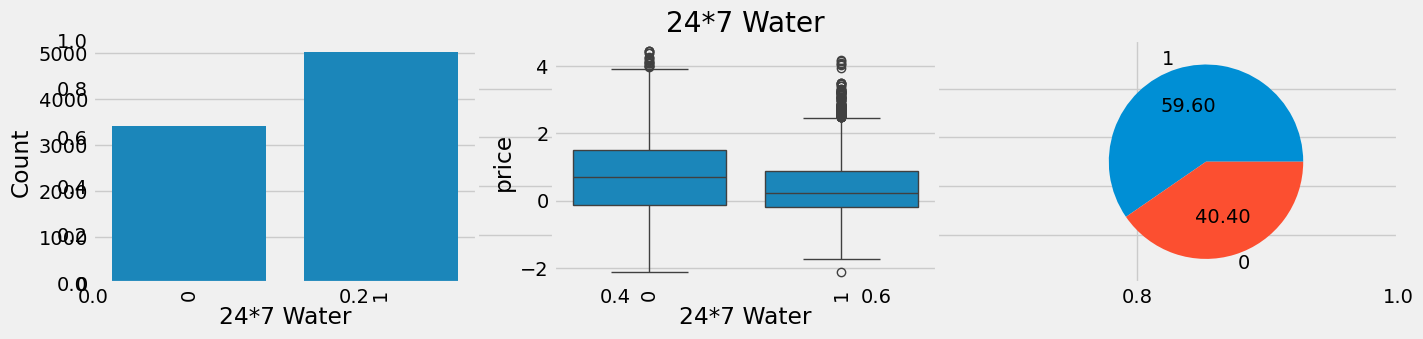

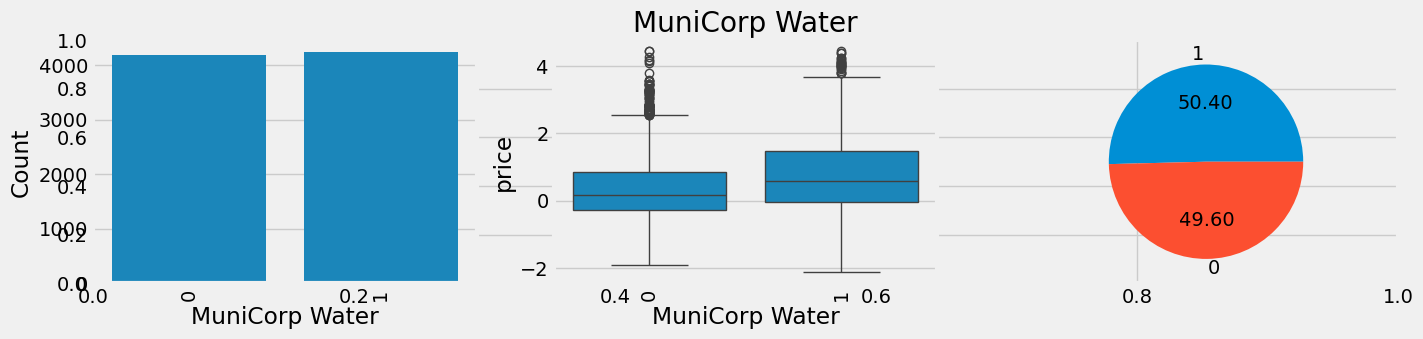

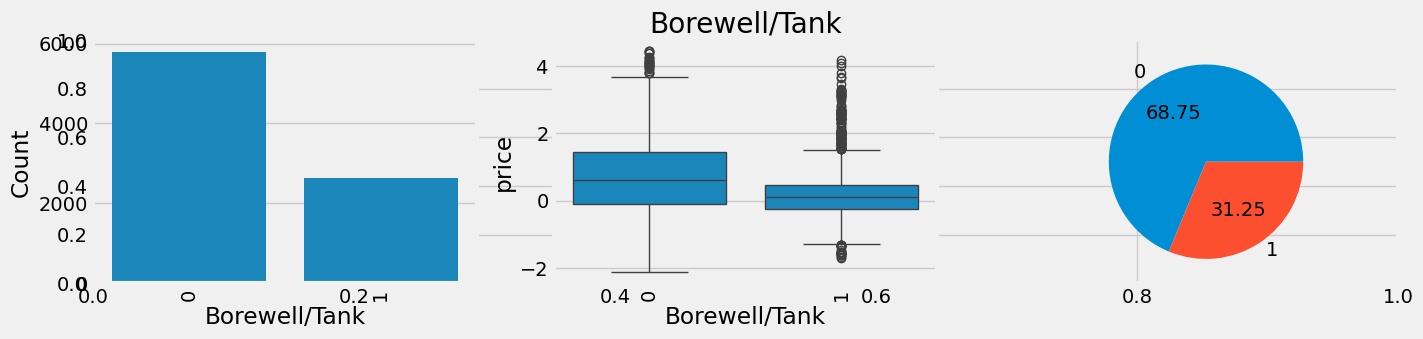

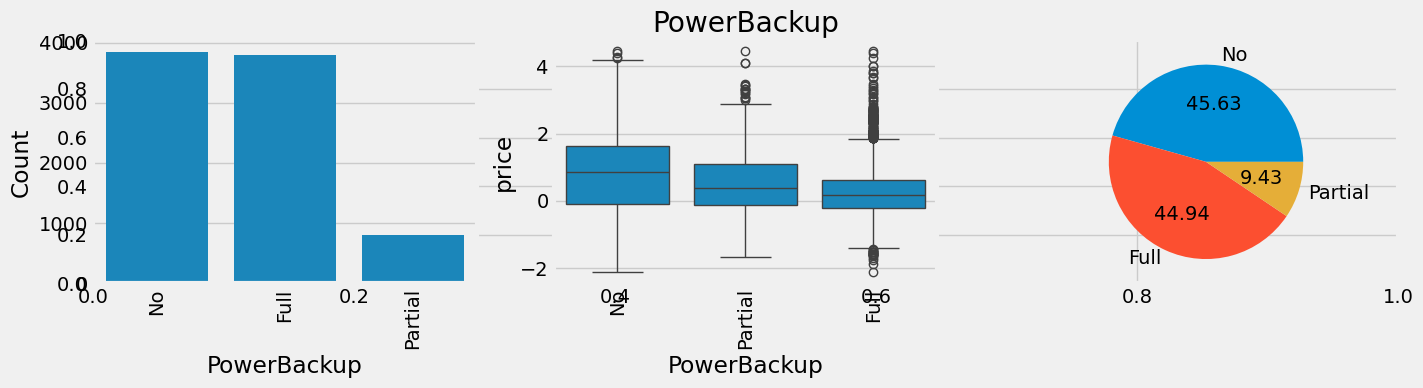

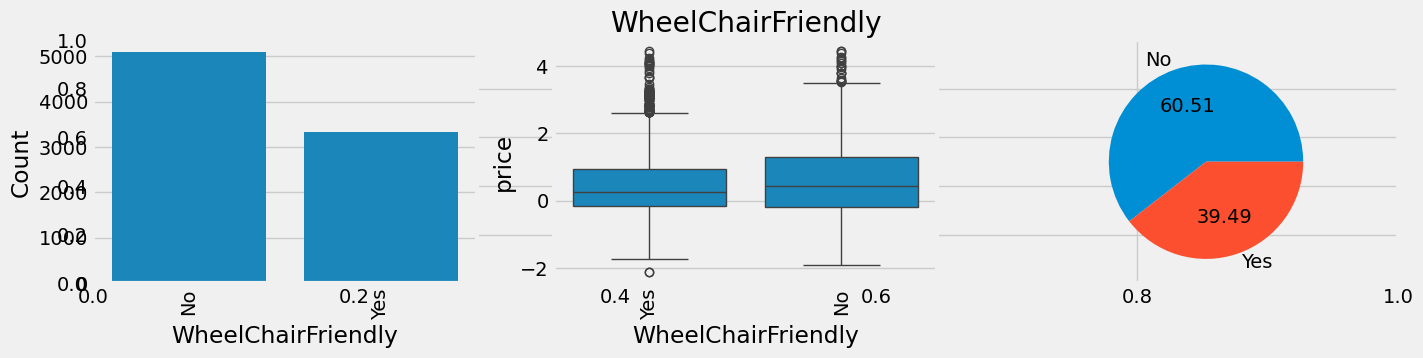

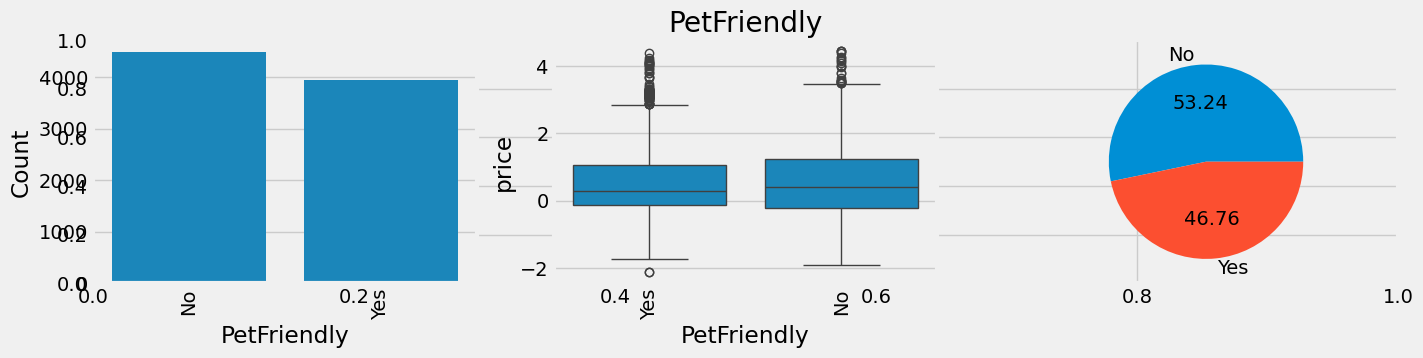

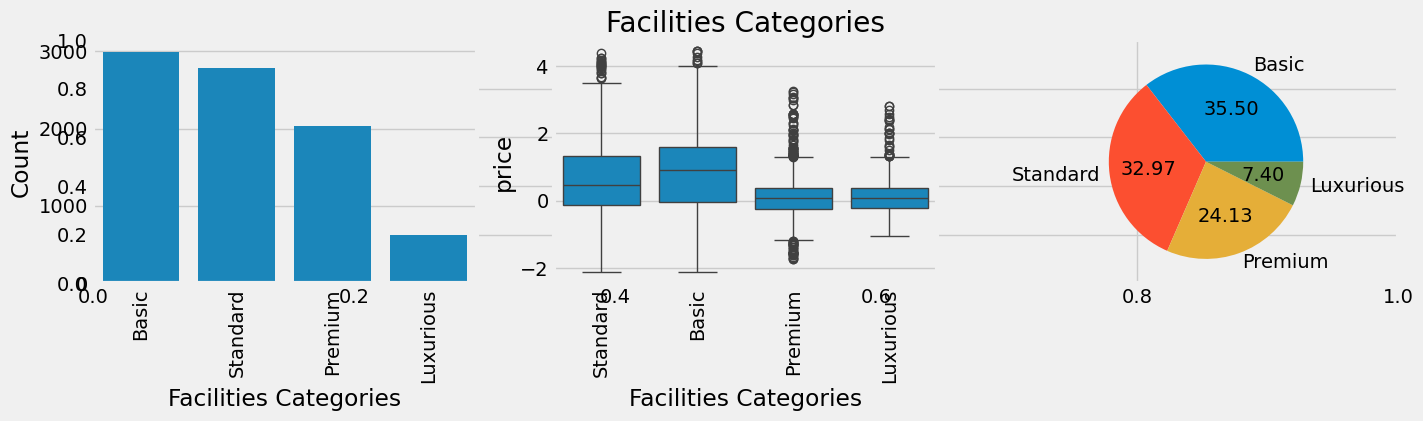

In [30]:
bar_box_pie_plot(cat_cols,df)

### Base Model

In [30]:
df.head(1)

,property_type,Sector,City,Area,bedRoom,bathroom,balcony,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,FloorRise,Main Road,Park/Garden,Pool,Club,Overlook Others,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,Facilities Categories,price
0,House/Villa,Sector 15 Chandigarh,Chandigarh,9.798127,7,7,4,0,1,0,0,0,North-West,0,Low-Rise,0,0,0,0,1,Old,Marble,No,Semifurnished,3,3,1,1,0,No,Yes,Yes,Standard,3.367296


In [31]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Ordinal Encoding

In [32]:
odn_cols_list = ['property_type','Sector','City','facing','FloorRise','agePossession','Flooring','GatedCommunity','Furnishing','PowerBackup','WheelChairFriendly','PetFriendly','Facilities Categories'] 

In [33]:
odn_enc = ColumnTransformer(
    [('odn_cols',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),odn_cols_list)],
    remainder= 'passthrough'
)

In [34]:
# class preprocess_df(BaseEstimator, TransformerMixin):
#     def fit(self,X,y):
#         self.y_mean_ = y.mean()
#         return self

#     def transform(self,X,y):
#         X_tnf = self.logX_tnf(X)
#         y_tnf = self.logY_tnf(y)
#         return X_tnf,y_tnf

#     def logX_tnf(self,df):
#         df['Area'] = np.log(df['Area'])
#         return df
        
#     def logY_tnf(self,df):
#         df = np.log(df)
#         return df
        

In [35]:
# class preprocess_df(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         # Fit method calculates any necessary statistics
#         if y is not None:
#             self.y_mean_ = y.mean()
#         else:
#             self.y_mean_ = None
#         return self

#     def transform(self, X, y=None):
#         # Transform both X and y
#         X_tnf = self.logX_tnf(X)
#         if y is not None:
#             y_tnf = self.logY_tnf(y)
#             return X_tnf, y_tnf
#         return X_tnf

#     def logX_tnf(self, df):
#         df = df.copy()  # Avoid modifying the original dataframe
#         df['Area'] = np.log(df['Area'])
#         return df

#     def logY_tnf(self, y):
#         return np.log(y)


In [36]:
model = Pipeline(
    [#('preprocessor',preprocess_df()),
    ('encoding',odn_enc),
    ('scaler',StandardScaler()),
    ('xgb_reg',XGBRegressor())]    
)

In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['r2', 'neg_mean_absolute_error']

In [38]:
## XGBoostRegressor
xgb_scores = cross_validate(model, X, y, cv=kf, scoring=scoring,return_train_score = True)
print(f"R2: {np.mean(xgb_scores['test_r2']):.4f} ± {np.std(xgb_scores['test_r2']):.4f}")
print(f"MAE: {-np.mean(xgb_scores['test_neg_mean_absolute_error']):.4f} ± {np.std(xgb_scores['test_neg_mean_absolute_error']):.4f}")

R2: 0.9574 ± 0.0035
MAE: 0.0930 ± 0.0020


In [39]:
# model_dict = {
#     'linear_reg':LinearRegression(),
#     'svr':SVR(),
#     'ridge':Ridge(),
#     'LASSO':Lasso(),
#     'decision tree': DecisionTreeRegressor(),
#     'random forest':RandomForestRegressor(),
#     'extra trees': ExtraTreesRegressor(),
#     'gradient boosting': GradientBoostingRegressor(),
#     'adaboost': AdaBoostRegressor(),
#     'mlp': MLPRegressor(),
#     'xgboost':XGBRegressor(),
#     'catboost':CatBoostRegressor()
# }

In [40]:
# def scorer(model_name, model):
#     odn_cols_list = ['property_type','Sector','City','facing','FloorRise',
#                      'agePossession','Flooring','GatedCommunity',
#                      'Furnishing','PowerBackup','WheelChairFriendly',
#                      'PetFriendly','Facilities Categories'] 
#     odn_enc = ColumnTransformer(
#                     [('odn_cols',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),odn_cols_list)],
#                      remainder= 'passthrough'
#               )
    
#     kf = KFold(n_splits=5, shuffle=True, random_state=42)
#     scores = ['r2', 'neg_mean_absolute_error']

#     pipeline = Pipeline(
#                     [('encoding',odn_enc),
#                      ('scaler',StandardScaler()),
#                      ('model',model)]    
#                 )
    
#     model_scores =  cross_validate(pipeline, X, y, cv=kf, scoring=scores,return_train_score = True)
#     return model_name,round(np.mean(model_scores['test_r2']),4),round(-np.mean(model_scores['test_neg_mean_absolute_error']),4)



In [41]:
# model_output = []
# for model_name,model in model_dict.items():
#     model_output.append(scorer(model_name, model))

In [42]:
# pd.DataFrame(model_output,columns = ['Model','R2','MAE'])

### Random Forest Feature Importance

In [43]:
temp_df = X.copy()

In [44]:
odn_enc_tmp = ColumnTransformer(
    [('odn_cols',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),odn_cols_list)],
)

In [45]:
enc_df = odn_enc_tmp.fit_transform(temp_df)

In [46]:
temp_df[odn_cols_list] = pd.DataFrame(enc_df,columns=odn_cols_list)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(temp_df,y,test_size=0.2,random_state=42)

In [48]:
rf = RandomForestRegressor(random_state=42)
rf.fit(temp_df,y)
fi = rf.feature_importances_

In [49]:
fi_df = pd.DataFrame(list(zip(X.columns,fi *100))).sort_values(by=1,ascending=False).reset_index(drop=True)
fi_df

,0,1
0,Area,74.799037
1,property_type,6.382360
2,bedRoom,4.673935
3,City,3.990859
4,Sector,3.884539
5,bathroom,1.429100
6,FloorRise,0.714829
7,FloorNo,0.702599
8,agePossession,0.413743
9,OpenParking,0.320595


In [50]:
X.drop(columns=['Store Room','Other Room','Main Road','Park/Garden','Club','Overlook Others','Pool','PetFriendly','WheelChairFriendly'],inplace = True)

In [51]:
odn_cols_list.remove('PetFriendly')
odn_cols_list.remove('WheelChairFriendly')

In [52]:
X.head(1)

,property_type,Sector,City,Area,bedRoom,bathroom,balcony,Pooja Room,Servant Room,Study Room,facing,FloorNo,FloorRise,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,Facilities Categories
0,House/Villa,Sector 15 Chandigarh,Chandigarh,9.798127,7,7,4,0,1,0,North-West,0,Low-Rise,Old,Marble,No,Semifurnished,3,3,1,1,0,No,Standard


In [53]:
xgb_model = Pipeline(
    [('encoding',odn_enc),
    ('scaler',StandardScaler()),
    ('xgb_reg',XGBRegressor(max_depth = 5,min_child_weight=5))]    
)

In [54]:
## XGBoostRegressor
xgb_scores = cross_validate(xgb_model, X, y, cv=kf, scoring=scoring,return_train_score = True)
print(f"R2: {np.mean(xgb_scores['test_r2']):.4f} ± {np.std(xgb_scores['test_r2']):.4f}")
print(f"MAE: {np.expm1(-np.mean(xgb_scores['test_neg_mean_absolute_error'])):.4f} ± {np.expm1(np.std(xgb_scores['test_neg_mean_absolute_error'])):.4f}")

R2: 0.9582 ± 0.0026
MAE: 0.0997 ± 0.0010


In [55]:
cat_model = Pipeline(
    [('encoding',odn_enc),
    ('scaler',StandardScaler()),
    ('cat_reg',CatBoostRegressor(verbose=False))]    
)

In [56]:
## CatBoostRegressor
cat_scores = cross_validate(cat_model, X, y, cv=kf, scoring=scoring,return_train_score = True)
print(f"R2: {np.mean(cat_scores['test_r2']):.4f} ± {np.std(cat_scores['test_r2']):.4f}")
print(f"MAE: {np.expm1(-np.mean(cat_scores['test_neg_mean_absolute_error'])):.4f} ± {np.expm1(np.std(cat_scores['test_neg_mean_absolute_error'])):.4f}")

R2: 0.9610 ± 0.0030
MAE: 0.0970 ± 0.0021


In [57]:
X.head(1)

,property_type,Sector,City,Area,bedRoom,bathroom,balcony,Pooja Room,Servant Room,Study Room,facing,FloorNo,FloorRise,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,Facilities Categories
0,House/Villa,Sector 15 Chandigarh,Chandigarh,9.798127,7,7,4,0,1,0,North-West,0,Low-Rise,Old,Marble,No,Semifurnished,3,3,1,1,0,No,Standard


In [58]:
cat_model.fit(X,y)

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('odn_cols',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['property_type', 'Sector',
                                                   'City', 'facing',
                                                   'FloorRise', 'agePossession',
                                                   'Flooring', 'GatedCommunity',
                                                   'Furnishing', 'PowerBackup',
                                                   'Facilities Categories'])])),
                ('scaler', StandardScaler()),
                ('cat_reg',
                 <catboost.core.CatBoostRegressor object at 0x0000023953977910>)])

In [59]:
cols_list = X.columns

In [160]:
np.log(900)

6.802394763324311

In [152]:
data = [['Flat/Apartment','Sector 20 Panchkula','Panchkula',7.355641102974253,3,2,4,1,0,0,'North',5,'Mid-Rise','Old','Vitrified','Yes','Semifurnished',1,1,1,1,1,'Full','Standard']]

In [178]:
data = [['House/Villa','Dhakoli','Mohali',6.802394763324311,2,1,1,1,0,0,'South',0,'Low-Rise','Old','Vitrified','Yes','Semifurnished',1,2,0,1,1,'Partial','Standard']]

In [179]:
one_df = pd.DataFrame(data, columns = cols_list)

In [180]:
one_df

,property_type,Sector,City,Area,bedRoom,bathroom,balcony,Pooja Room,Servant Room,Study Room,facing,FloorNo,FloorRise,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,Facilities Categories
0,House/Villa,Dhakoli,Mohali,6.802395,2,1,1,1,0,0,South,0,Low-Rise,Old,Vitrified,Yes,Semifurnished,1,2,0,1,1,Partial,Standard


In [181]:
pred = np.expm1(cat_model.predict(one_df))[0]
print(f"House Price is in Between {round((pred - 0.05),2)} Cr to {round((pred + 0.05),2)} Cr, With Average Price of {round(pred,2)}")

House Price is in Between 0.51 Cr to 0.61 Cr, With Average Price of 0.56


In [150]:
X['property_type'].value_counts()

property_type
Flat/Apartment    4901
House/Villa       3242
Builder Floor      286
Name: count, dtype: int64

In [349]:
pd.options.display.max_rows = None

In [151]:
df[df['City'] == 'Panchkula']['Sector'].value_counts()

Sector
Pinjore                  228
Sector 20 Panchkula      102
Peer Muchalla            100
Sector 15 Panchkula       77
Sector 21 Panchkula       76
Sector 7 Panchkula        58
Sector 4 Panchkula        53
Mansa Devi Complex        51
Sector 10 Panchkula       50
Sector 9 Panchkula        47
Sector 11 Panchkula       44
Sector 17 Panchkula       41
Sector 8 panchkula        40
Sector 2 Panchkula        36
Sector 12 A Panchkula     35
Sector 25 Panchkula       30
Sector 26 Panchkula       29
Sector 6 Panchkula        28
Sector 16 Panchkula       27
Sector 12 Panchkula       26
Sector 28 Panchkula       18
Zirakpur                  18
Sector 27 Panchkula       11
Sector 19 Panchkula        7
Sector 23 Panchkula        6
Sector 24 Panchkula        6
Sector 14 Panchkula        6
Kalka                      5
Sector 3 Panchkula         4
Sector 31 Panchkula        4
Sector 18 Panchkula        3
Chandi Mandir              2
Sector 29                  1
Ramgarh                    1
Name: c

In [231]:
df['Facilities Categories'].value_counts()

Facilities Categories
Basic        2992
Standard     2779
Premium      2034
Luxurious     624
Name: count, dtype: int64

In [434]:
df[df['Sector'] == 'Sector 9 Chandigarh']

,property_type,Sector,City,Area,bedRoom,bathroom,balcony,Pooja Room,Servant Room,Store Room,Study Room,Other Room,facing,FloorNo,FloorRise,Main Road,Park/Garden,Pool,Club,Overlook Others,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,24*7 Water,MuniCorp Water,Borewell/Tank,PowerBackup,WheelChairFriendly,PetFriendly,Facilities Categories,price
91,House/Villa,Sector 9 Chandigarh,Chandigarh,9.988747,4,4,3,1,1,1,1,0,South,0,Low-Rise,0,0,0,0,0,Old,Concrete,No,Unfurnished,6,7,1,1,1,No,Yes,Yes,Standard,4.174387
114,House/Villa,Sector 9 Chandigarh,Chandigarh,9.798127,5,3,4,0,1,0,0,0,North,0,Low-Rise,0,0,0,0,0,Old,Marble,No,Unfurnished,0,0,0,0,0,No,No,No,Basic,4.094345
117,House/Villa,Sector 9 Chandigarh,Chandigarh,10.203592,5,4,4,0,1,0,0,0,South-West,0,Low-Rise,0,0,0,0,0,ModOld,Vitrified,No,Unfurnished,0,0,0,0,0,No,No,No,Basic,4.442651
158,House/Villa,Sector 9 Chandigarh,Chandigarh,9.798127,6,4,2,0,0,0,0,0,North,0,Low-Rise,0,0,0,0,0,Old,Marble,No,Unfurnished,4,4,0,0,0,No,No,No,Basic,4.276666
173,House/Villa,Sector 9 Chandigarh,Chandigarh,10.203592,5,4,2,0,0,0,0,0,North,0,Low-Rise,0,0,0,0,0,ModOld,Vitrified,No,Unfurnished,1,1,0,0,0,No,No,No,Basic,3.806662
175,House/Villa,Sector 9 Chandigarh,Chandigarh,9.517090,5,5,4,1,1,0,1,1,North,0,Low-Rise,1,1,0,0,0,Old,Marble,Yes,Semifurnished,4,5,0,1,0,Full,No,Yes,Standard,3.806662
176,House/Villa,Sector 9 Chandigarh,Chandigarh,10.203592,5,5,2,0,0,0,0,0,North,0,Low-Rise,1,0,0,0,1,New,Wood,No,Unfurnished,0,0,0,1,0,Full,Yes,Yes,Standard,3.850148
177,House/Villa,Sector 9 Chandigarh,Chandigarh,10.206920,5,4,2,1,0,0,1,1,North,0,Low-Rise,1,1,0,0,1,Old,Vitrified,Yes,Semifurnished,4,2,0,1,0,Full,Yes,Yes,Basic,3.688879
178,House/Villa,Sector 9 Chandigarh,Chandigarh,9.680344,5,5,4,0,0,0,0,0,North,0,Low-Rise,0,0,0,0,0,ModOld,Vitrified,No,Unfurnished,1,1,0,0,0,No,No,No,Basic,3.465736
179,House/Villa,Sector 9 Chandigarh,Chandigarh,10.021271,5,5,4,1,1,0,1,0,North,0,Low-Rise,1,0,0,0,0,Old,Marble,No,Semifurnished,6,7,0,1,0,Full,No,No,Basic,4.007333
